![image](https://github.com/The-Knowledge-House/DS_22/assets/26397102/c2da183a-1b28-462e-850b-6b319e7b09ef)

# Iris Dataset

The following notebook is a combination of guided EDA and one-v-rest classification. All credit to the original authors. 

Your job is to fill in the missing code-blocks and analyze the outputs that your code produces.

Credit to [bexgboost](https://www.kaggle.com/bextuychiev) for one-v-rest modeling, and credit to [panmie](https://www.kaggle.com/tumpanjawat) for iris EDA. 

Modifications to instructions and code are indicated via a note from me: (*Note*: ...)

## EDA

### Domain Knowledge 📚

This dataset is a rich source of information for understanding machine failure predictions. Let's break down the features and their potential implications:

📝 Iris Dataset is a classic dataset used in pattern recognition, machine learning, and data visualization. It was introduced by the British statistician and biologist Ronald Fisher in 1936. The dataset is small but does not lack in illustrating the challenges in clustering or classifying flowers based on the measurements of their characteristics.

The dataset contains 150 observations of iris flowers from three different variety Iris Setosa, Iris Versicolor, and Iris Virginica. There are 50 observations from each variety.

### Features

1. Sepal Length: This attribute represents the length of the sepal, which is the outermost whorl of a flower. It is measured in centimeters (cm). The sepal length provides information about the size of the sepal, which can vary across different species and can be useful in distinguishing between them.

2. Sepal Width: This attribute represents the width of the sepal, which is measured perpendicular to its length. It is also measured in centimeters (cm). The sepal width provides information about the shape and breadth of the sepal, which can vary across different species and can be used as a feature to differentiate between them.

3. Petal Length: This attribute represents the length of the petal, which is the innermost whorl of a flower. It is measured in centimeters (cm). The petal length provides information about the size and elongation of the petal, which can vary significantly across different species and is often used as a discriminating feature in flower classification tasks.

4. Petal Width: This attribute represents the width of the petal, which is measured perpendicular to its length. It is also measured in centimeters (cm). The petal width provides information about the shape, size, and breadth of the petal, which can differ across various species and can be a useful characteristic in distinguishing between them.

The above attributes, including sepal length, sepal width, petal length, and petal width, are important features of flowers in the iris dataset. They are commonly used in machine learning and statistical analysis to classify and identify different species of iris flowers based on their measurements. These measurements help in understanding the physical characteristics of the flowers and can be utilized for various applications in botany, ecology, and data analysis.

### Keep in Mind

The goal of the analysis using the Iris dataset is typically to create a Machine Learning model that can classify the species of the flower based on these four features. It's a multiclass classification problem, as there are more than two classes to predict, and each flower belongs to one of the three species.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder

In [2]:
# Load data
data = pd.read_csv("iris.csv")

In [4]:
# view first 5 rows of 'data'
data._ _ _()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Getting started with Descriptive Analysis

This project focuses on analyzing the Iris dataset to identify key factors associated with different species of iris flowers. By utilizing techniques such as univariate and bivariate analysis, as well as clustering methods like K-means clustering, we aim to uncover valuable insights into the relationships within the data and classify iris flowers accurately.

Our analysis offers a glimpse into the factors that contribute to distinguishing between iris flower species. However, it's important to interpret the findings with caution and avoid inferring causation from correlation alone. Further statistical testing and domain expertise are required to establish causal relationships and deeper understanding of the iris flowers.

Let's explore and then make results and discussion to gain deeper insights from our analysis. 🧐🔍

### EDA Overview 🚀

In this project, we delve into the iris dataset, which encompasses various Features such as sepal length, sepal width, petal length, petal width, and different types of iris species. Our primary aim is to explore the dataset, understand its distributions, and uncover patterns and relationships within the data.

Objectives

The main objectives of this project are threefold:

* To explore the dataset and comprehend the distributions of the features.
* To scrutinize the relationships between the features and iris species.
* To identify clusters within the data using appropriate clustering algorithms. (*Note*: not applicable here)

### Significance

The insights gleaned from this project could be instrumental in understanding the characteristics and patterns of different iris species. Moreover, the results could contribute to the development of classification models for iris species prediction and further research in botany and ecology.

📝 Note: While this project provides valuable insights, it's important to acknowledge that the findings are based on the iris dataset and may not generalize to other datasets or species.

In [6]:
### describe summary statistics of each numerical column
data._ _ _()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Inteperet the Results 📈¶

**Sepal Length:**

The average sepal length across all samples is approximately 5.84 cm, with a standard deviation of 0.83 cm. This means that most sepals are around this length, but there can be a variation of about 0.83 cm.
The shortest sepal is 4.3 cm, and the longest is 7.9 cm.
The 25%, 50% (median), and 75% percentiles indicate that 50% of the sepals have a length between 5.1 cm and 6.4 cm.

**Sepal Width:**

The average sepal width is about 3.05 cm, with a standard deviation of 0.43 cm.
The narrowest sepal is 2.0 cm, and the widest is 4.4 cm.
Half of the sepals have a width between 2.8 cm and 3.3 cm.

**Petal Length:**

The average petal length is approximately 3.76 cm, with a standard deviation of 1.76 cm, indicating a higher variability in petal length compared to sepal dimensions.
The shortest petal is 1.0 cm, and the longest is 6.9 cm.
Half of the petals have a length between 1.6 cm and 5.1 cm.

**Petal Width:**

The average petal width is about 1.20 cm, with a standard deviation of 0.76 cm.
The narrowest petal is 0.1 cm, and the widest is 2.5 cm.
Half of the petals have a width between 0.3 cm and 1.8 cm.

#### 🗒️ Keep in Mind

These statistics are crucial in understanding the distribution of our data. They can help us identify potential outliers, understand the range of our data, and decide on appropriate preprocessing methods for our Machine Learning model.

## Univariate Analysis

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


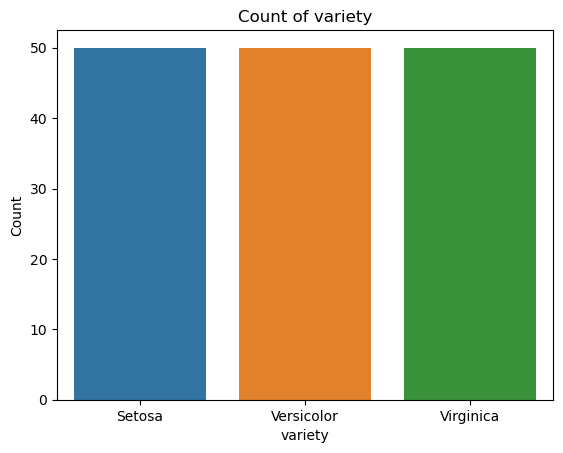

In [8]:
sns.countplot(data=data, x='variety')
plt.xlabel('variety')
plt.ylabel('Count')
plt.title('Count of variety')
plt.show()

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


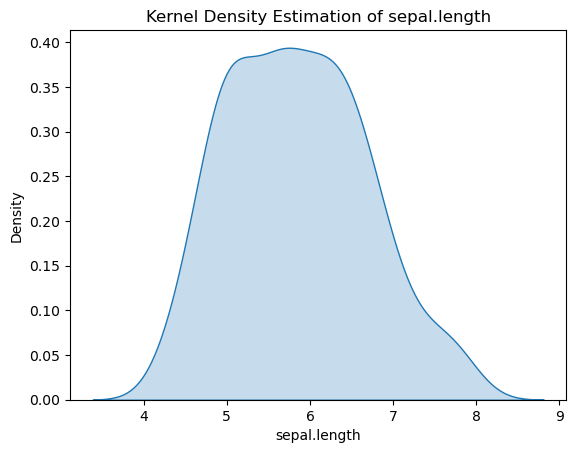

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


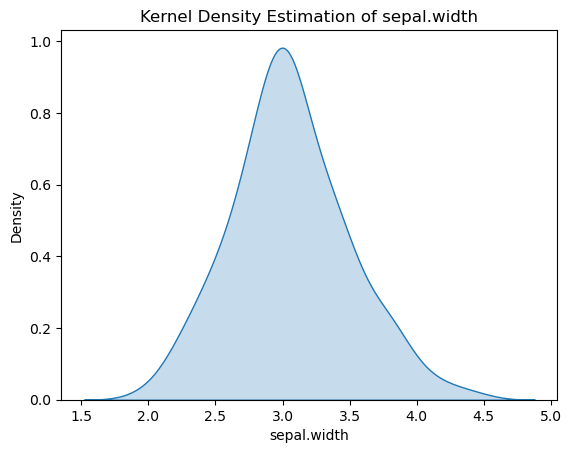

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


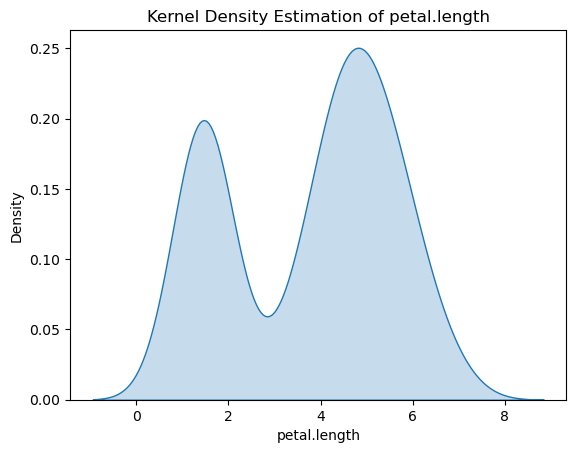

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


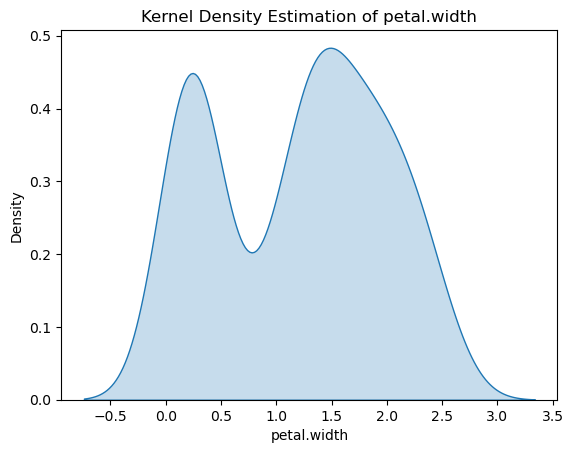

In [9]:
# Iterate over each feature column and plot kde plot
for feature in data.columns[:-1]:  # Exclude the last column 'variety'
    sns.kdeplot(data=data, x=feature, fill=True)
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f'Kernel Density Estimation of {feature}')
    plt.show()

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


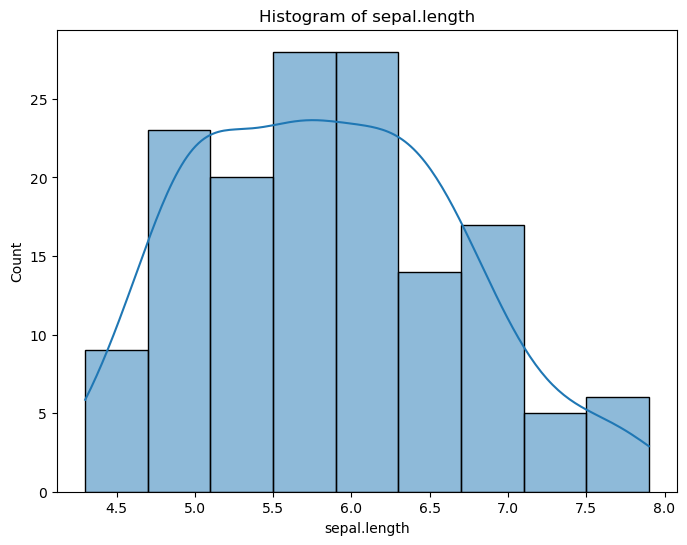

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


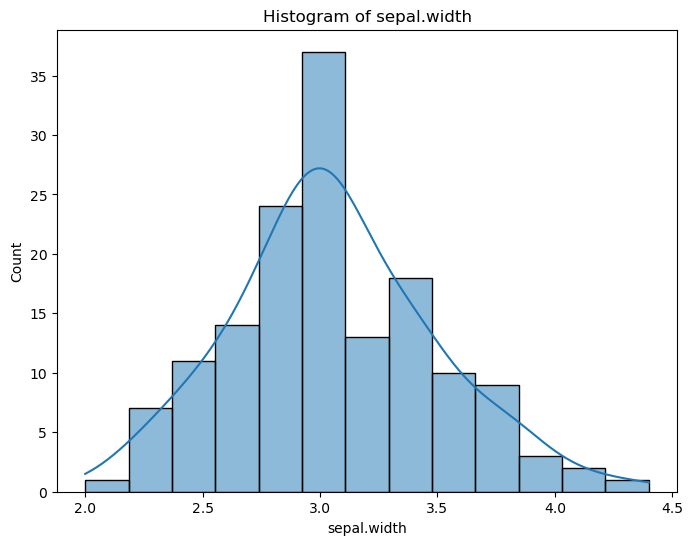

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


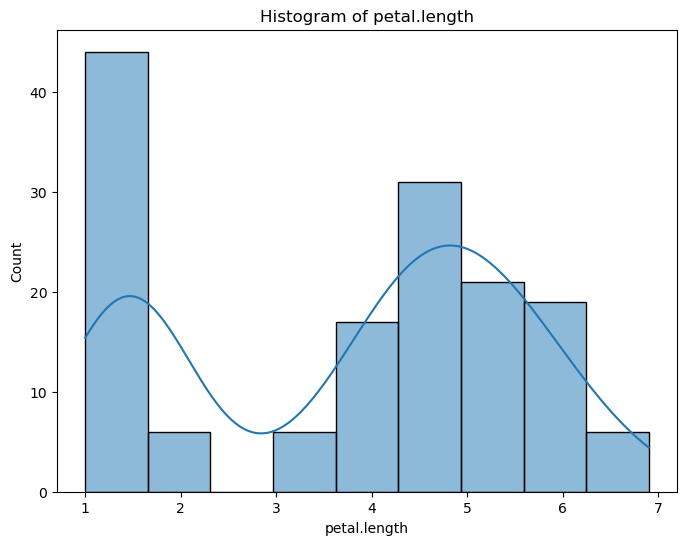

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


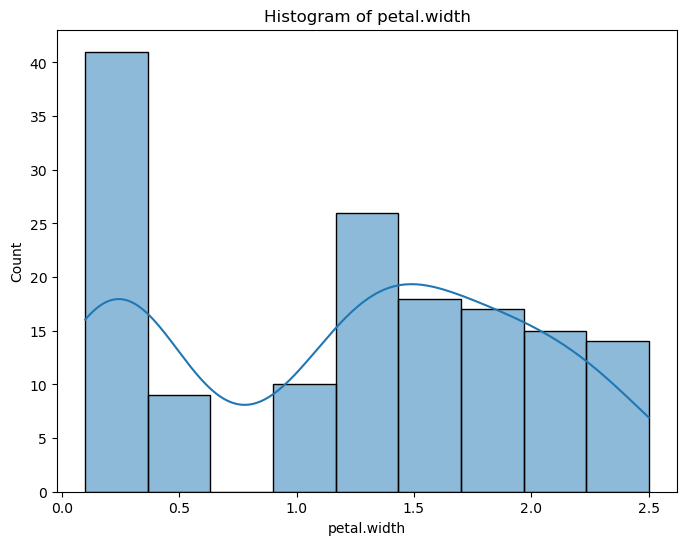

In [12]:
features = ['sepal.length','sepal.width','petal.length','petal.width']

# Iterate over each feature column and plot histplot
for feature in features:
    plt.figure(figsize=(8, 6))
    sns._ _ _(data=data, x=feature, kde=True)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Histogram of {feature}')
    plt.show()

## Inteperet the Results 📈

Let's analyze the univariate distributions of each feature in the Iris dataset.

**Petal Length:**

The histogram shows two distinct groups in the petal length data, which suggests that this feature might be a good indicator to differentiate between certain Iris variety.
One group is centered around a petal length of 1-2 cm, and the other is more spread out, ranging from 3 to 7 cm. This could potentially indicate a difference between a certain Iris species with shorter petals and the other species with longer petals.

**Petal Width:**

Similar to petal length, petal width also shows two distinct groups. One group has a petal width of less than 1 cm, and the other ranges from 1 to 2.5 cm.
This feature could also be useful in differentiating between Iris species.

**Sepal Length:**

The sepal length data appears to follow a normal distribution, with most of the lengths centered around 5-6 cm.
There doesn't seem to be a clear separation or grouping in the sepal length data, which suggests that sepal length alone might not be a good feature to differentiate between the species.

**Sepal Width:**

The sepal width data also appears to follow a normal distribution, with most of the widths centered around 3 cm.
Like sepal length, sepal width also doesn't show clear separations or groups, suggesting that it might not be as useful for differentiating between the species as petal length or petal width.

## Bivariate Analysis

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

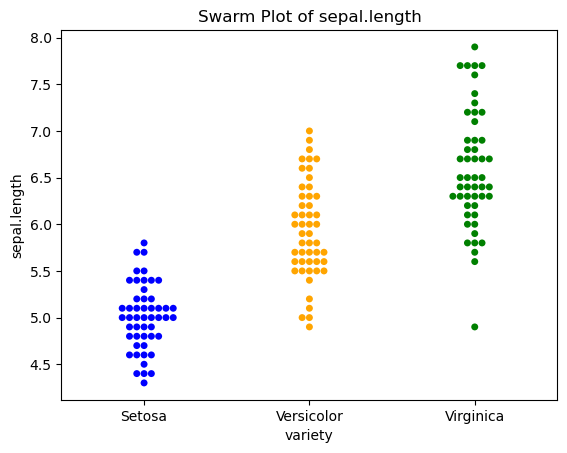

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

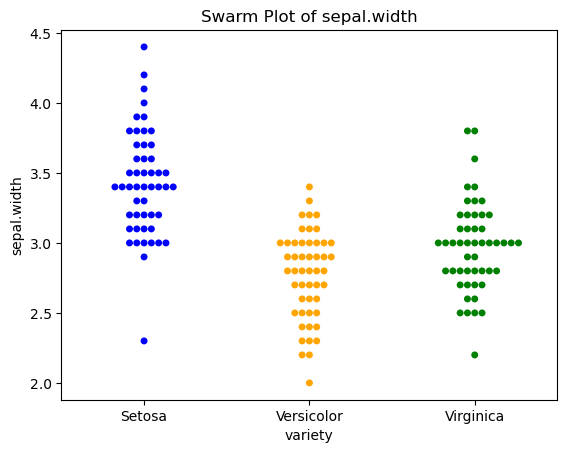

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

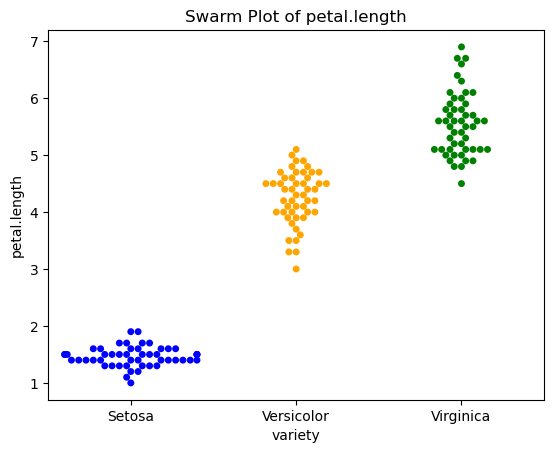

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

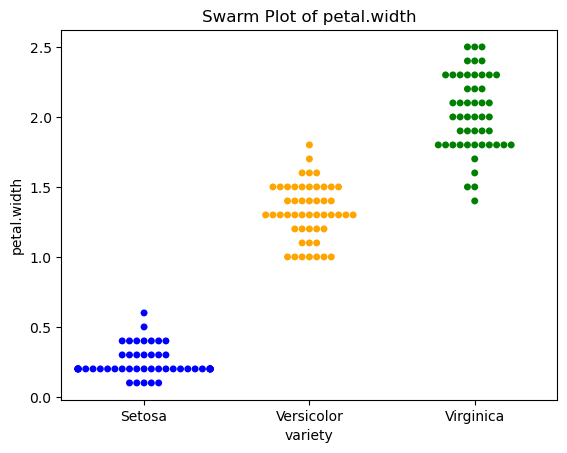

In [15]:
features = data.columns[:-1]  # Exclude the last column ('Species')

species_colors = {'setosa': 'blue', 'versicolor': 'orange', 'virginica': 'green'}

for feature in features:
    plt.figure()
    sns.swarmplot(data=data, x='variety', y=feature, palette=species_colors.values())
    plt.xlabel('variety')
    plt.ylabel(feature)
    plt.title(f'Swarm Plot of {feature}')
    plt.show()

## Inteperet the Results 📈

Let's analyze the bivariate distributions of each feature in the Iris dataset.

**Sepal Length:**

The swarm plot shows the distribution of sepal length for each species. It's clear that the Setosa species tends to have shorter sepals compared to the other two species.
Versicolor and Virginica have more overlap in sepal length, but Virginica tends to have slightly longer sepals.

**Sepal Width:**

The Setosa species tends to have wider sepals compared to the other two species.
Versicolor and Virginica also have some overlap in sepal width, but Versicolor tends to have slightly narrower sepals.

**Petal Length:**

The petal length clearly differentiates the Setosa species from the other two. Setosa has significantly shorter petals.
Versicolor and Virginica also show some differentiation, with Virginica having longer petals.

**Petal Width:**

Similar to petal length, petal width also clearly differentiates the Setosa species, which has narrower petals.
Versicolor has intermediate petal width, and Virginica has the widest petals.

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


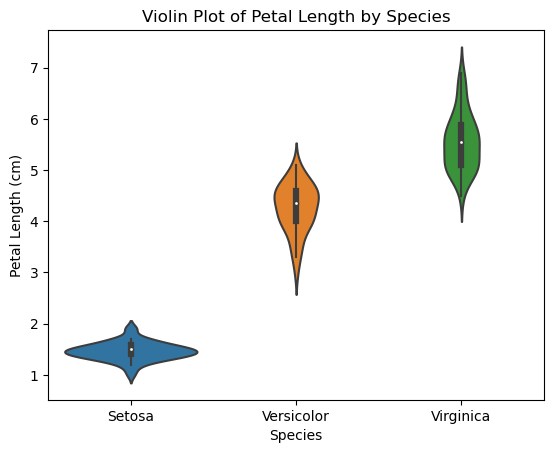

In [16]:
# create a violinplot on the data, exploring the relationship b/w variety and petal.length

sns.violinplot(data=data, x='variety', y='petal.length')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.title('Violin Plot of Petal Length by Species')
plt.show()

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

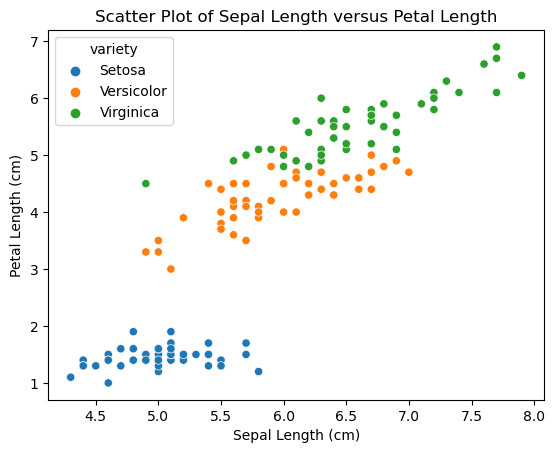

In [20]:
# create a scatter plot to view the relationship b/w sepal.length and petal.length

sns._ _ _(data=data, x='_ _ _', y='_ _ _', hue='variety')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Scatter Plot of Sepal Length versus Petal Length')
plt.show()

## Multivariate Analysis

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


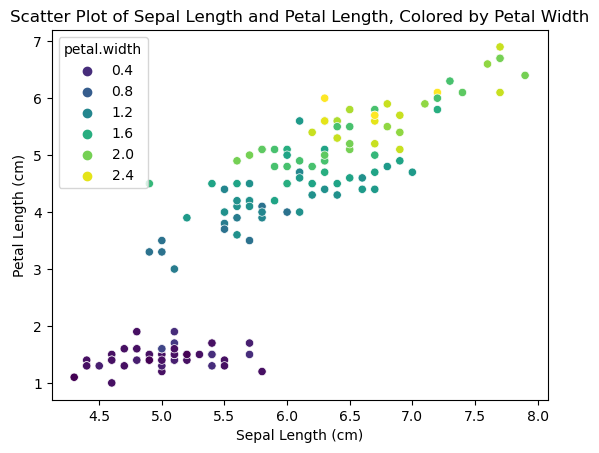

In [22]:
# create a scatterplot analyzing the relationship b/w sepal.length and petal.length. 
# express "petal.width" via the hue parameter to view how width varies across clusters 

sns.scatterplot(data=data, x='sepal.length', y='petal.length', hue='_ _ _', palette='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Scatter Plot of Sepal Length and Petal Length, Colored by Petal Width')
plt.show()

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


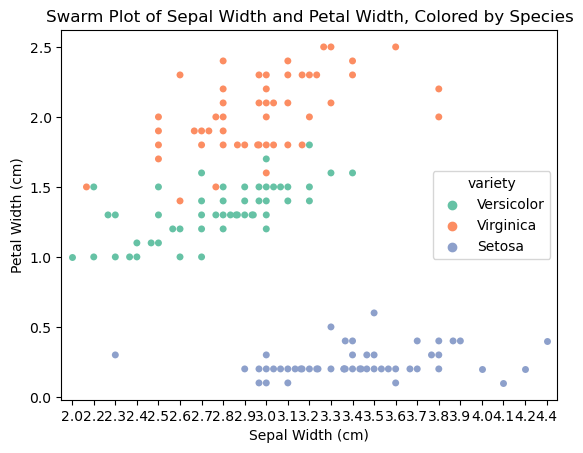

In [24]:
# create a swarmplot to view the relationship between sepal width and petalwidth across species

sns.swarmplot(data=data, x='sepal.width', y='petal.width', hue='variety', palette='Set2')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Swarm Plot of Sepal Width and Petal Width, Colored by Species')
plt.show()

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

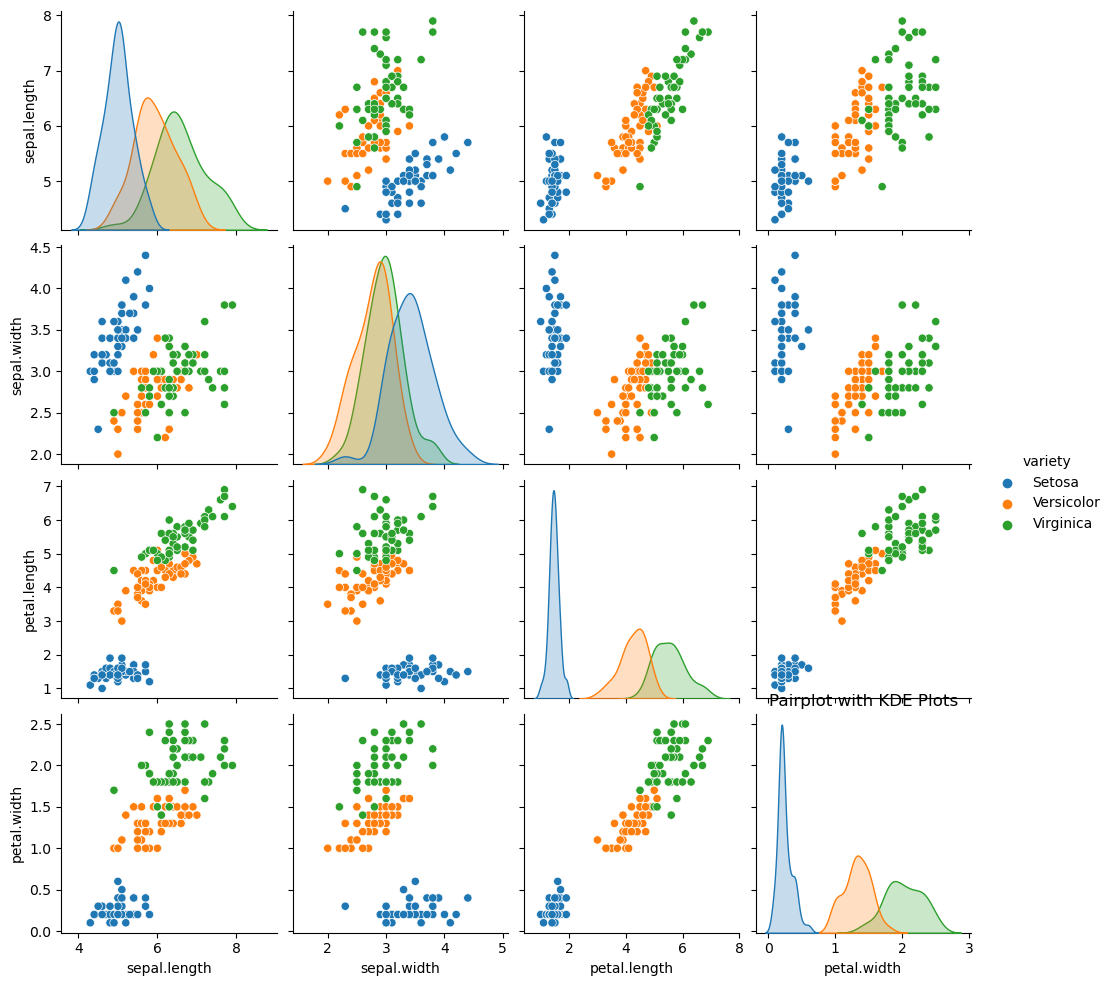

In [26]:
# create a pairplot to view all relationships across numerical columns
# Note: This will take a little while to run

sns._ _ _(data=data, hue='_ _ _', diag_kind='kde')
plt.title('Pairplot with KDE Plots')
plt.show()

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

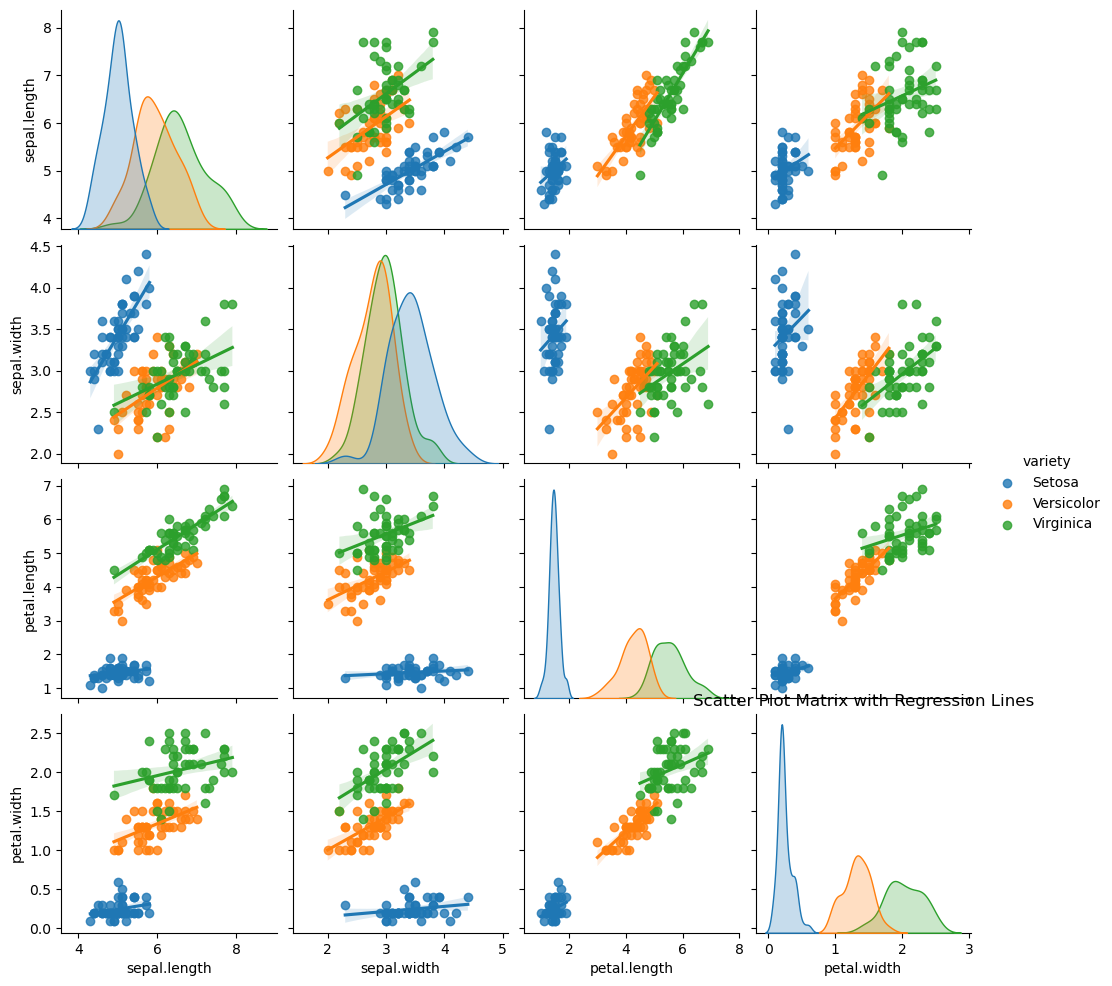

In [27]:
# create a pairplot to view all relationships across numerical columns with an added regressor to 
# view modeled relationships

sns.pairplot(data=data, kind='reg', hue='variety')
plt.title('Scatter Plot Matrix with Regression Lines')
plt.show()

c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

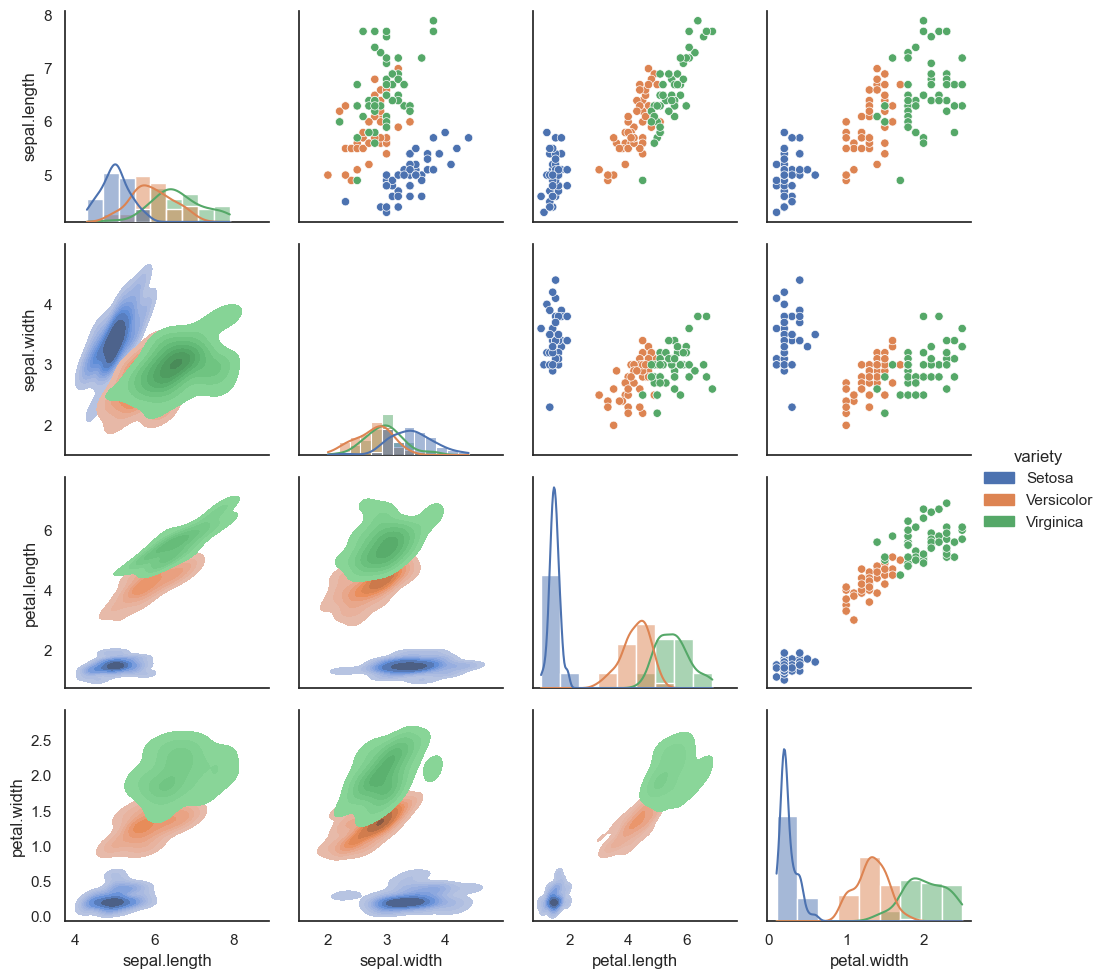

In [28]:
# create a pairgrid with 2-dimensional kde-plots in the lower half of the pairgrid to view clusters

sns.set(style="white")
g = sns.PairGrid(data, hue="variety")
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)
g.add_legend()
plt.show()

## Inteperet the Results 📈

**Sepal Length vs. Sepal Width:**
There's some overlap between the species, but it's clear that Setosa generally has shorter and wider sepals compared to the other two species.

**Petal Length vs.Petal Width:** 
This pair of features clearly differentiates the species. Setosa has shorter and narrower petals, Versicolor has medium-length and medium-width petals, and Virginica has the longest and widest petals.

**Sepal Length vs. Petal Length and Sepal Length vs. Petal Width:**
These plots show that Setosa has shorter sepals and petals, while Virginica has the longest sepals and petals. Versicolor falls in between.

**Sepal Width vs. Petal Length and Sepal Width vs. Petal Width:**
These plots show that Setosa has wider sepals and shorter petals. On the other hand, Virginica has narrower sepals and longer petals. Versicolor falls in between.

#### 🗒️ Keep in Mind

Multivariate analysis is a crucial step in exploratory data analysis as it allows us to understand the relationships between different pairs of variables and how they collectively relate to the species of the Iris flower. These plots suggest that petal measurements may be more useful features for differentiating between the species compared to sepal measurements in our Machine Learning model.

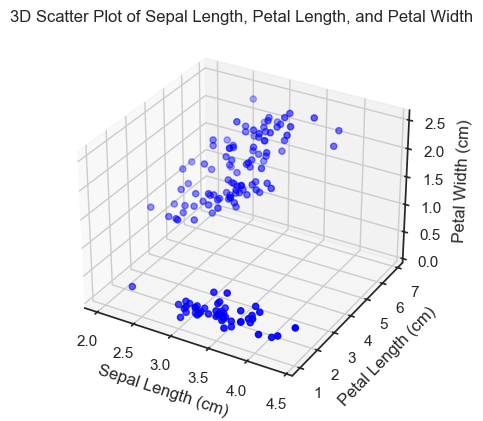

In [30]:
# plot a 3D plot to get a sense of "distance" b/w clusters

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['sepal.width'], data['petal.length'], data['petal.width'], c='blue')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.set_zlabel('Petal Width (cm)')
ax.set_title('3D Scatter Plot of Sepal Length, Petal Length, and Petal Width')
plt.show()

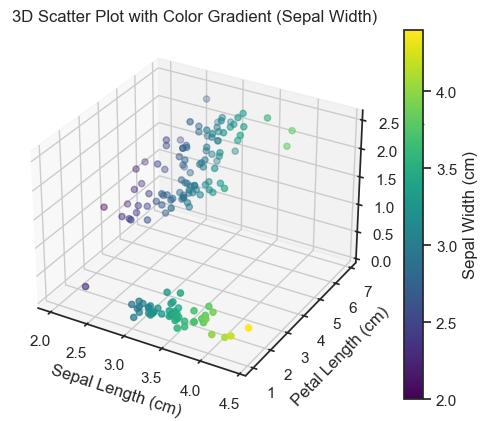

In [31]:
# plot a 3D plot to get a sense of "distance" b/w clusters with added hue for more analysis across dimensions

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(data['sepal.width'], data['petal.length'], data['petal.width'], c=data['sepal.width'], cmap='viridis')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.set_zlabel('Petal Width (cm)')
ax.set_title('3D Scatter Plot with Color Gradient (Sepal Width)')
cbar = plt.colorbar(sc)
cbar.set_label('Sepal Width (cm)')
plt.show()

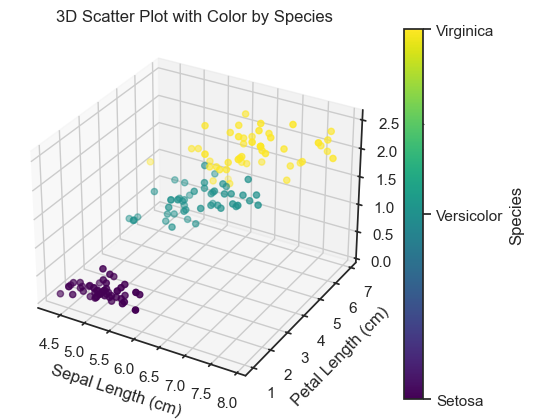

In [34]:
# include a parameter to view data-points in clusters

# Map species to numeric values
species_mapping = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}
data['SpeciesNumeric'] = data['variety'].map(species_mapping)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(data['sepal.length'], data['petal.length'], data['petal.width'], c=data['SpeciesNumeric'], cmap='viridis')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.set_zlabel('Petal Width (cm)')
ax.set_title('3D Scatter Plot with Color by Species')
cbar = plt.colorbar(sc)
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(species_mapping.keys())
cbar.set_label('Species')
plt.show()

## Inteperet the Results 📈

Here's what we can observe from this 3D scatter plot:

The Iris-setosa species (blue points) is clearly separated from the other two species. This suggests that setosa has distinct feature measurements compared to versicolor and virginica, which aligns with our previous observations from the univariate, bivariate, and multivariate analyses.

The Iris-versicolor and Iris-virginica species (orange and green points, respectively) show some overlap but also some degree of separation. This suggests that while these two species have similar feature measurements, there are still differences that can be used to distinguish between them.

## Pre-Process Your Data

(*Note*: we'll continue to emphasize this point in the coming days, but keep in mind that columns that exist in different ranges should be scaled for better predictions)

Preprocessing is a crucial step before training the model. In this case, numerical features are standardized (mean removed and scaled to unit variance), and categorical features are one-hot encoded. Standardization is not required for all models but is generally a good practice. One-hot encoding is necessary for categorical variables to be correctly understood by the machine learning model.​The StandardScaler in sklearn is based on the assumption that the data, Y, follows a distribution that might not necessarily be Gaussian (normal), but we still transform it in a way that its distribution will have a mean value 0 and standard deviation of 1.​

In other words, given a feature vector x, it modifies the values as [follows](https://www.simplypsychology.org/z-score.html#:~:text=The%20formula%20for%20calculating%20a,by%20the%20population%20standard%20deviation.).

In [36]:
numerical_columns = ['sepal.length','sepal.width','petal.length','petal.width']

# create a standard scaler object
scaler = StandardScaler()

# Scale the numerical columns
scaled_numerical = scaler.fit_transform(data[_ _ _])

scaled_numerical

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [37]:
# Convert the scaled numerical columns into a dataframe
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [39]:
# Concatenate the target variables and scaled numerical columns
processed_df = pd.concat([data["variety"], scaled_numerical_df], axis=1)

## Correlation Matrix

## 📊 Correlation Matrix Interpretation:

This is a correlation matrix that provides the pairwise correlation of all columns in the dataframe. The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation. Here are some interpretations of your results:

Species_Iris-setosa is strongly negatively correlated with PetalLengthCm and PetalWidthCm (-0.92 and -0.88 respectively). This means that as the petal length and width increase, it's less likely to be a setosa. 📉

Species_Iris-versicolor has weak positive correlations with PetalLengthCm and PetalWidthCm (0.20 and 0.12 respectively), meaning these dimensions do not contribute significantly to being a versicolor. ➖

Species_Iris-virginica has fairly strong positive correlations with PetalLengthCm and PetalWidthCm (0.72 and 0.77 respectively). This suggests that as petal length and width increase, it's more likely to be a virginica. 📈

SepalLengthCm has strong positive correlations with PetalLengthCm and PetalWidthCm (0.87 and 0.81 respectively). This implies that as sepal length increases, petal length and width also tend to increase. 📈

SepalWidthCm is negatively correlated with PetalLengthCm and PetalWidthCm (-0.42 and -0.35 respectively), suggesting that as the sepal width increases, the petal length and width tend to decrease, but this correlation is not very strong. 📉

PetalLengthCm and PetalWidthCm are very strongly correlated (0.96), implying that petal length and width tend to increase together. 📈

💡 Remember that correlation does not imply causation. This analysis only shows the relationship between two variables but does not necessarily mean that one causes the other to change. For example, just because petal length and width are correlated does not mean increasing the petal length causes the width to increase. There could be a third factor influencing both.

... now we move towards OvR classification ...

## Multiclass Classification

Even though multi-class classification is not as common, it certainly poses a much bigger challenge than binary classification problems. You can literally take my word for it because this article has been the most challenging post I have ever written (have written close to 70).

I found that the topic of multiclass classification is deep and full of nuances. I have read so many articles, read multiple StackOverflow threads, created a few of my own, and spent several hours exploring the Sklearn user guide and doing experiments. The core topics of multiclass classification such as 

* choosing a strategy to binarize the problem
* choosing a base mode
* understanding excruciatingly many metrics 
* filtering out a single metric that solves your business problem and customizing it
* tuning hyperparameters for this custom metric
* and finally putting all the theory into practice with Sklearn

have all been scattered in the dark, sordid corners of the Internet. This was enough to conclude that no single resource shows an end-to-end workflow of dealing with multiclass classification problems on the Internet (maybe, I missed it).

For this reason, this article will be a comprehensive tutorial on how to solve any multiclass supervised classification problem using Sklearn. You will learn both the theory and the implementation of the above core concepts. It is going to be a long and technical read, so get a coffee!

## Inherently Multiclass Models

Depending on the model you choose, Sklearn approaches multiclass classification problems in 3 different ways. In other words, Sklearn estimators are grouped into 3 categories by their strategy to deal with multi-class data.

The first and the biggest group of estimators are the ones that support multi-class classification natively:

naive_bayes.BernoulliNB
tree.DecisionTreeClassifier
tree.ExtraTreeClassifier
ensemble.ExtraTreesClassifier
naive_bayes.GaussianNB
neighbors.KNeighborsClassifier
svm.LinearSVC (setting multi_class=”crammer_singer”)`
linear_model.LogisticRegression (setting multi_class=”multinomial”)
linear_model.LogisticRegressionCV (setting multi_class=”multinomial”)

## One vs One Classifiers

Binary classifiers that support mutliclass classification with One-vs-One (OVO) strategy
Other supervised classification algorithms were mainly designed for the binary case. However, Sklearn implements two strategies called One-vs-One (OVO) and One-vs-Rest (OVR, also called One-vs-All) to convert a multi-class problem into a series of binary tasks.

OVO splits a multi-class problem into a single binary classification task for each pair of classes. In other words, for each pair, a single binary classifier will be built. For example, a target with 4 classes - brain, lung, breast, and kidney cancer, uses 6 individual classifiers to binarize the problem:

Classifier 1: lung vs breast
Classifier 2: lung vs kidney
Classifier 3: lung vs brain
Classifier 4: breast vs kidney
Classifier 5: breast vs brain
Classifier 6: kidney vs brain

Sklearn suggests these classifiers to work best with OVO approach:

svm.NuSVC
svm.SVC
gaussian_process.GaussianProcessClassifier (setting multi_class = “one_vs_one”)

Sklearn also provides a wrapper estimator for the above models under sklearn.multiclass.OneVsOneClassifier:

In [42]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC

# Don't have to set `multi_class` argument if used with OVOClassifier
ovo = OneVsOneClassifier(estimator=GaussianProcessClassifier())

A major downside of this strategy is its computation workload. As each pair of classes require a separate binary classifier, targets with high cardinality may take too long to train. To compute the number of classifiers that will be built for an N-class problem, the following formula is used:

![image](https://github.com/The-Knowledge-House/DS_22/assets/26397102/2a0dc0b8-be58-4def-8725-b43c91e93945)

In practice, One-vs-Rest strategy is much preferred because of this disadvantage

## One vs Rest Classifier

Binary classifiers that support mutliclass classification with One-vs-Rest (OVR) strategy
Alternatively, the OVR strategy creates an individual classifier for each class in the target. Essentially, each binary classifier chooses a single class and marks it as positive, encoding it as 1. The rest of the classes are considered negative labels and, thus, encoded with 0. For classifying 4 types of cancer:

Classifier 1: lung vs. [breast, kidney, brain] - (lung cancer, not lung cancer)
Classifier 2: breast vs. [lung, kidney, brain] - (breast cancer, not breast cancer)
Classifier 3: kidney vs. [lung, breast, brain] -  (kidney cancer, not kidney cancer)
Classifier 4: brain vs. [lung, breast kidney] - (brain cancer, not brain cancer)

Sklearn suggests these classifiers to work best with OVR approach:

ensemble.GradientBoostingClassifier  
gaussian_process.GaussianProcessClassifier (setting multi_class = “one_vs_rest”)  
svm.LinearSVC (setting multi_class=”ovr”)  
linear_model.LogisticRegression (setting multi_class=”ovr”)  
linear_model.LogisticRegressionCV (setting multi_class=”ovr”)  
linear_model.SGDClassifier  
linear_model.Perceptron  

Alternatively, you can use the above models with the default OneVsRestClassifier:

In [43]:
from sklearn.linear_model import Perceptron
from sklearn.multiclass import OneVsRestClassifier

# Init/fit
ovr = OneVsRestClassifier(estimator=Perceptron())

Even though this strategy significantly lowers the computational cost, the fact that only one class is considered positive and the rest as negative makes each binary problem an imbalanced classification. This problem is even more pronounced for classes with low proportions in the target.

In both approaches, depending on the passed estimator, the results of all binary classifiers can be summarized in two ways:

* majority of the vote: each binary classifier predicts one class and the class that got the most votes from all classifiers is chosen

* depending on the argmax of class membership probability scores: classifiers such as LogisticRegression computes probability scores for each class (.predict_proba()). Then, the argmax of the sum of the scores is chosen.

We will talk more about how to score each of these strategies later in the tutorial.

In [46]:
from sklearn.model_selection import train_test_split

# Build feature/target arrays
X, y = data.drop("variety", axis=1), data["variety"].values.flatten()

# encode species label numerically 
le = LabelEncoder()
y = le.fit_transform(y)

# Create train/test sets, where test set is 25% of data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1121218, test_size=_ _ _, stratify=y
)

In [47]:
from sklearn.linear_model import LogisticRegression

# define model via 'ovr' multi_class classification
model = LogisticRegression(multi_class="_ _ _", class_weight="balanced")

# fit the model
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', multi_class='ovr')

In [48]:
# view accuracy scores for each available label

for i in range(len(np.unique(y_train))):
    sub_model = LogisticRegression(penalty=model.penalty, C=model.C)
    sub_model.coef_ = model.coef_[i].reshape(1, -1)
    sub_model.intercept_ = model.intercept_[i].reshape(-1, 1)
    sub_model.classes_ = np.array([0, 1])

    y_train_ovr = np.where(y_train == i, 1, 0)
    score = sub_model.score(X_train, y_train_ovr)

    print(f"OVR for label={i}, score={score:.4f}")

OVR for label=0, score=1.0000
OVR for label=1, score=0.9375
OVR for label=2, score=1.0000


c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\phase1\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
